# Preparing the R environment

Install the required packages to be used in the project, set the themes for the plot and configure warning suppresion for cleaner output.

In [1]:
# Suppressing warnings for a cleaner output
options(warn=-1)

# Installing required packages for plotting and training
library(ggpubr)
library(tidymodels)

# Setting up the plot size and theme
options(repr.plot.width = 12, repr.plot.height = 6)

theme <-
  theme_minimal() +
  theme(
    plot.title = element_text(size=14, face="bold", color="gray30"),
    plot.subtitle = element_text(size=13, face="bold", color="gray30"),
    axis.title = element_text(size=13, color="gray30"),
    plot.caption = element_text(size=13, color = "gray60"),
    legend.text = element_text(size=13, color="gray30"),
    legend.title = element_text(size=13, color="gray30"),
    strip.text.x = element_text(size=13, face="bold", color="gray30")
  )

theme_set(theme)

markdown_theme <-
  theme_minimal() +
  theme(
    plot.title = element_text(size=8, face="bold", color="gray30"),
    plot.subtitle = element_text(size=8, face="bold", color="gray30"),
    axis.title = element_text(size=6, color="gray30"),
    axis.text = element_text(size=6, color="gray30"),
    plot.caption = element_text(size=6, color = "gray60"),
    legend.text = element_text(size=6, color="gray30"),
    legend.title = element_text(size=6, color="gray30"),
    strip.text.x = element_text(size=6, face="bold", color="gray30")
  )


Loading required package: ggplot2
-- Attaching packages -------------------------------------- tidymodels 0.1.2 --
v broom     0.7.2      v recipes   0.1.15
v dials     0.0.9      v rsample   0.0.8 
v dplyr     1.0.2      v tibble    3.0.4 
v infer     0.5.3      v tidyr     1.1.2 
v modeldata 0.1.0      v tune      0.1.2 
v parsnip   0.1.4      v workflows 0.2.1 
v purrr     0.3.4      v yardstick 0.0.7 
-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x purrr::discard() masks scales::discard()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x recipes::step()  masks stats::step()


# Exploratory Data Analysis: COVID-19

In this Jupyter notebook, we perform a self expertimentation of Exploratory Data Analysis (EDA) for Denmark's COVID-19 cases in R. R is a language and environment for statistical computing and graphics ([*source: R project*](https://www.r-project.org/about.html)) which fits perfectly for this project as the goal is to visualize data and tell a conclusion/story based on real decisions.

## Identify business problem

The first step to Exploratory Data Analysis (EDA) is to identify the business problem. The business case revolves around the understanding of the situation and the use of data to prevent spread of COVID-19 virus in Denmark. The aim is to analyze the data and compare against the decisions made and enforced by the officials and the health experts, primarily the two lockdowns from March and Decemberof 2020. This EDA is not a solution to the problem but the ambition is to understand if gathering factual data aided in effective decision making by the authorities. 

## Data collection

The data used in this analysis is collected from Statistibanken, which is a public database maintained and made available by Danmarks Statistik --- the central statistics office in Denmark under the Ministry of Economy. The data consists of official records of total people tested, infections, deaths and admission to hospital to among other key figures. The data was collected starting from March 21, 2020, which gets updated frequently. The latest data as of conducting the experiment is up until December 15, 2020.

## Data preparation

The data from Statistikbanken is made available in multiple formats so people can choose how they want the data, for example: an Excel sheet or a plain text file. For this analaysis, we chose to use the data as a CSV (comma-separated value) file for ease of use. In the following steps, we will go through the process of loading the data, tidying it and preparing it for the analysis.

### Load the dataset

In the following steps, we load the dataset into this R notebook and inspect if it is workable and understandable. If not, we must proceed to transform the data as deemed necessary. Without appropraite and clear understanding of data, the anaylsis will be out of scope.

After we load the data into the R notebook, we examine to ensure the target data and/or key figures exists. 

In [2]:
list.files(".")

[1] "covid-data-statistikbanken.csv" "EDA-COVID.ipynb"               
[3] "README.md"

In [3]:
# Create a dataframe by reading the file containing the dataset

covid_data_sb <- read.csv("covid-data-statistikbanken.csv")
head(covid_data_sb)

X.,M03D21,M03D22,M03D23,M03D24,M03D25,M03D26,M03D27,M03D28,M03D29,...,M12D06,M12D07,M12D08,M12D09,M12D10,M12D11,M12D12,M12D13,M12D14,M12D15
Confirmed cases of COVID-19 (total),1326,1395,1450,1577,1715,1851,2010,2201,2395,...,90603,92649,94799,97357,100489,103564,107116,109758,113095,116087
Recovered from COVID-19 infection (total,..,..,..,..,..,..,..,..,..,...,70876,71882,73052,74367,75664,76927,78236,79394,80564,82099
Number of persons tested for COVID-19 (total),11657,12351,12843,13756,14870,15981,17275,18810,20198,...,3524861,3541148,3556264,3572954,3592677,3611456,3630815,3646152,3664247,3680607
Deaths with COVID-19 (total),22,25,31,37,43,55,67,76,84,...,899,905,912,922,928,935,943,954,961,961
Deaths with COVID-19 per day,3,3,6,6,6,12,12,9,8,...,8,6,7,10,6,7,8,11,7,0
Persons hospitalised in connection with COVID-19,206,232,254,301,350,386,430,459,499,...,302,328,354,349,342,361,371,390,429,439


### Data wrangling

Now that the target data is loaded and ready to be used, we print a few columns of the data with `head` command and inspect if any transformations are required. In the initial inspection, the data looks to be well prepared and organized but still not ready to be used. Based on the requirements and researchers, the transformations required is subjective. For our use case, the required transformations are listed below:

_**This process of transforming data into another format is called "data wrangling".**_

1. The key indicators, i.e the names describing the values, are the first values of each rows. Ideally, they should be the first values in each of columns. In simple terms, the x-axis and y-axis needs to be reversed. This requires the dataframe to be transposed (or rotated).
2. The key indicator names are very long. To adhere to R's naming covention, we rename each of the key indicators to short, meaningful names and follow snake case using "_", for example `some_key_indicator`.
3. The format of the date is "MxxDxx". For maximum flexibility and understanding, we transform this to the international ISO date format of `yyyy-mm-dd`. This is done using R's built in functions in the following steps.
4. This dataset is missing one of the key figures, which is the daily new cases. Since we have the total number of cases for everyday, we substract that value of a day with that value of the day before to calculate the daily new cases. 
    - For example: total case for March 22 = 1395, total case for March 21 = 1326. So daily new case of March 21 = 1395 - 1326 = 69.
5. The missing values are represented by `..`. Those should updated to either empty values or `NA` so that R can interpret it as missing value.
6. Change the data types of the attributes if needed. Since the data is read from a CSV file, R may not be able to correctly interpret the data type. For example, if `total_tested` is interpreted as `character` instead of `numeric`, it'll fail to plot the data or train a model based on that data.

In [4]:
# 1. Transposing a dataframe: https://stackoverflow.com/a/6645587/9332260
denmark_covid_data <- t(covid_data_sb[,2:ncol(covid_data_sb)])
colnames(denmark_covid_data) <- covid_data_sb[,1] 
head(denmark_covid_data)

,Confirmed cases of COVID-19 (total),Recovered from COVID-19 infection (total,Number of persons tested for COVID-19 (total),Deaths with COVID-19 (total),Deaths with COVID-19 per day,Persons hospitalised in connection with COVID-19,Patients in intensive care units in connection with COVID-19,Patients on ventilators in connection with COVID-19
M03D21,1326,..,11657,22,3,206,42,35
M03D22,1395,..,12351,25,3,232,46,40
M03D23,1450,..,12843,31,6,254,55,47
M03D24,1577,..,13756,37,6,301,59,58
M03D25,1715,..,14870,43,6,350,87,76
M03D26,1851,..,15981,55,12,386,94,78


In [5]:
# 2. Rename column names: https://stackoverflow.com/a/16031013/9332260
denmark_covid_data <- cbind(rownames(denmark_covid_data), denmark_covid_data)
rownames(denmark_covid_data) <- NULL
colnames(denmark_covid_data) <- c("original_date",
                                  "total_cases",
                                  "total_recovered",
                                  "total_tested",
                                  "total_deaths",
                                  "daily_deaths",
                                  "daily_hospitalized",
                                  "daily_patients_icu",
                                  "daily_patients_ventilators")
denmark_covid_data <- as.data.frame(denmark_covid_data)

In [6]:
# Verifying that the renaming of columns was successful
head(denmark_covid_data)

original_date,total_cases,total_recovered,total_tested,total_deaths,daily_deaths,daily_hospitalized,daily_patients_icu,daily_patients_ventilators
M03D21,1326,..,11657,22,3,206,42,35
M03D22,1395,..,12351,25,3,232,46,40
M03D23,1450,..,12843,31,6,254,55,47
M03D24,1577,..,13756,37,6,301,59,58
M03D25,1715,..,14870,43,6,350,87,76
M03D26,1851,..,15981,55,12,386,94,78


In [7]:
# 3. Change date format to ISO format
# 5. Change missing data ".." to NA 
denmark_covid_data <- denmark_covid_data %>%
  mutate(
      date = as.Date(original_date, "M%mD%d"),
      day = row_number(date) - 1,
      total_recovered = na_if(total_recovered, ".."),
      total_tested = na_if(total_tested, ".."),
      daily_hospitalized = na_if(daily_hospitalized, ".."),
      daily_patients_icu = na_if(daily_patients_icu, ".."),
      daily_patients_ventilators = na_if(daily_patients_ventilators, ".."),
  )

In [8]:
# Inspect the structure of the dataframe
str(denmark_covid_data)

'data.frame':	270 obs. of  11 variables:
 $ original_date             : Factor w/ 270 levels "M03D21","M03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total_cases               : Factor w/ 254 levels "  13173","  13262",..: 243 244 245 246 247 248 249 250 251 252 ...
 $ total_recovered           : Factor w/ 242 levels "  12209","  12251",..: NA NA NA NA NA NA NA NA NA NA ...
 $ total_tested              : Factor w/ 254 levels "..","1001512",..: 15 21 24 31 39 46 54 64 71 77 ...
 $ total_deaths              : Factor w/ 201 levels "    611","    613",..: 181 182 183 184 185 186 198 199 200 201 ...
 $ daily_deaths              : Factor w/ 48 levels "      0","      1",..: 45 45 46 46 46 41 41 48 47 40 ...
 $ daily_hospitalized        : Factor w/ 197 levels "     12","     13",..: 186 187 188 189 190 191 192 193 194 196 ...
 $ daily_patients_icu        : Factor w/ 109 levels "      0","      1",..: 104 105 106 107 108 109 98 99 100 101 ...
 $ daily_patients_ventilators: Factor w/ 93 levels "      

In [9]:
# 6. Update the data types 
denmark_covid_data$total_cases <- as.numeric(as.character(denmark_covid_data$total_cases))
denmark_covid_data$total_recovered <- as.numeric(as.character(denmark_covid_data$total_recovered))
denmark_covid_data$total_tested <- as.numeric(as.character(denmark_covid_data$total_tested))
denmark_covid_data$total_deaths <- as.numeric(as.character(denmark_covid_data$total_deaths))
denmark_covid_data$daily_deaths <- as.numeric(as.character(denmark_covid_data$daily_deaths))
denmark_covid_data$daily_hospitalized <- as.numeric(as.character(denmark_covid_data$daily_hospitalized))
denmark_covid_data$daily_patients_icu <- as.numeric(as.character(denmark_covid_data$daily_patients_icu))
denmark_covid_data$daily_patients_ventilators <- as.numeric(as.character(denmark_covid_data$daily_patients_ventilators))

In [10]:
# 5. Add a new column for daily new cases
denmark_covid_data <- 
denmark_covid_data %>%
  arrange(date) %>%
   mutate(
       new_cases = total_cases - lag(total_cases, 1, 0),
   ) %>% arrange(date)

denmark_covid_data$new_cases[1]=71

### Verify data

In the previous iterations of this analysis, we used the dataset from [Our World in Data](https://ourworldindata.org/coronavirus/country/denmark?country=~DNK), who sourced their data from John Hopkins University. During that analysis, we had created plot for total confirmed cases in Denmark which had numbers of around 8.5 million confirmed cases. Denmark has a total population of under 6 million so that dataset had wrong data. To confirm that the issue was not in our code, we also did a manual inspection of the CSV file, and the total confirmed cases was more than 8.5 million.

To ensure we don't face similar issue, manual cross-checking of data from StatisktikBanken was done against the aforementioned Our World in Data dataset from previous iterations, to ensure its validaity and integreity.

## Analyze the data

Now that the data has been appropriately transformed, the next step is to analyze the data. To do so, we plot the data with different variables to get an understanding of the effect caused by COVID-19 and get answer to questions related to the pandemic. These plots also help tell a story to the general public as it provides an meaning overview, without going into details, at a glance.

### Have the lockdowns and mask mandate had an effect?

The plot below focuses on the daily cases of COVID-19 virus from March to December 2020. The light-orange shades (actual color: `navajowhite1`) represents the lockdown periods and the dashed line represents the enforcement of mask mandate in Denmark.

The plot shows that the initial lockdown from March 21, 2020 to April 13, 2020 certainly aided in reducing the number of daily cases. From a purely numbers perspectives, the number of new daily cases certainly started to gain inclination from September onwards. The mask mandate enforced from end of October barely helped in flattening the curve and the line started to peak during the end of the year.

This helps in explaining that when the pandemic was new and under-studied, the public must have been extra careful. But as time went on, it seems like this might not have been the case. Even with the mask mandate and second lockdown in place, the plot resulted in steep incline in the slope with record-breaking daily cases in December. It is important to keep in mind that this plot does not take COVID tests, people's behaviour and other similar factors into account.

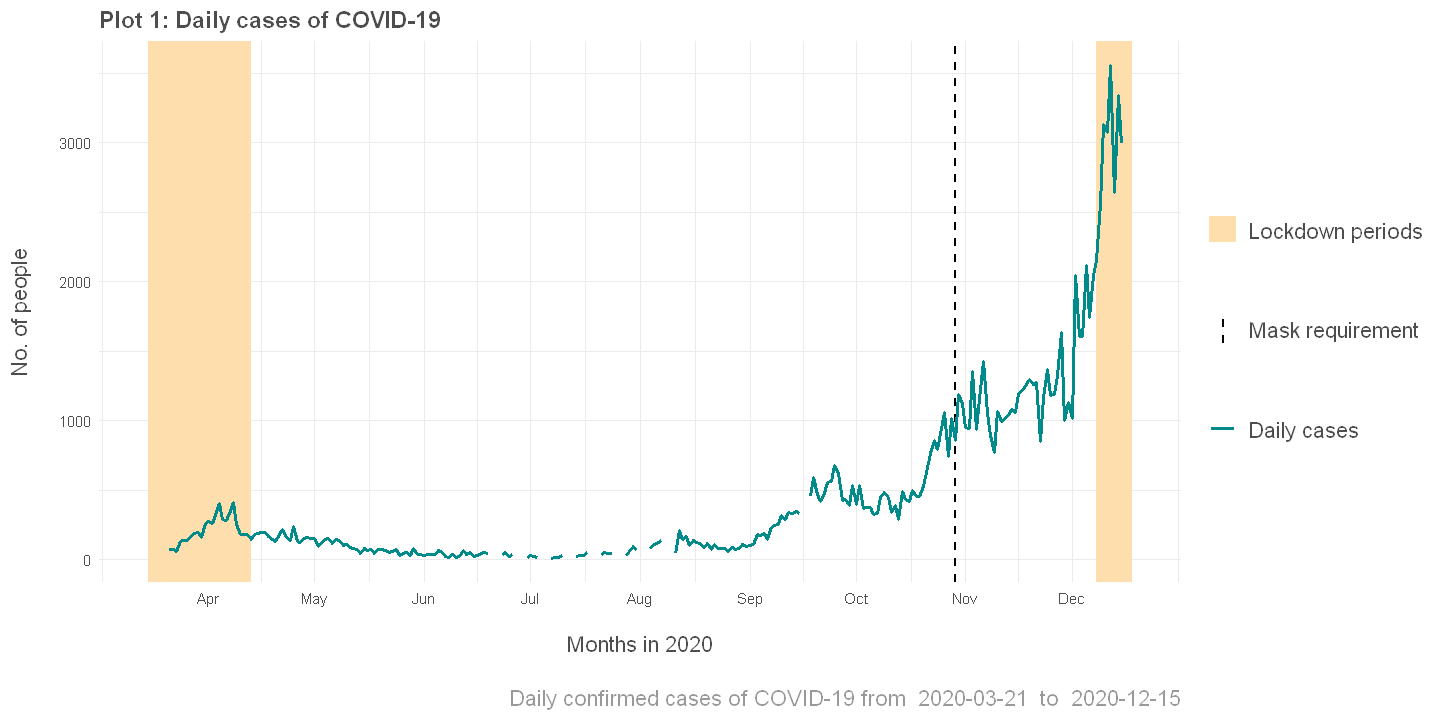

In [11]:
ggplot(denmark_covid_data, aes(x = date)) +

geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-18"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +


geom_line(aes(y = new_cases, color = "cyan4"), lwd=1) +
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people\n") +                                    # Label for y-axis

ggtitle("Plot 1: Daily cases of COVID-19") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="navajowhite1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("cyan4"),
                     labels = c("Daily cases"),
                     guide = "legend") +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) +
labs(
    caption = paste("\nDaily confirmed cases of COVID-19 from ", min(denmark_covid_data$date), " to ", max(denmark_covid_data$date))
)

### Is there a correlation between number of tests and cases?

The plot above, Plot 1, visualizes that the number of cases increased as the time passed by. But this plot is missing a key factor in understanding why there was an increase in cases. To get a better understanding, we must also take into account the increase in testing done to confirm COVID-19 cases. In the initial days, there were limited supply of testing resources so only the vulnerable ones were tested. But as the testing resources expanded over time, the non-vulnerable group of people also got the opportubity to be tested. This is one of the factors resulting in increase of cases as shown in plot 1.

To visualize this hypothesis, we can plot them on a graph and analyse the behaviour over time. The idea is to get a glance at the relationship between the total tests conducted and total confirmed cases.

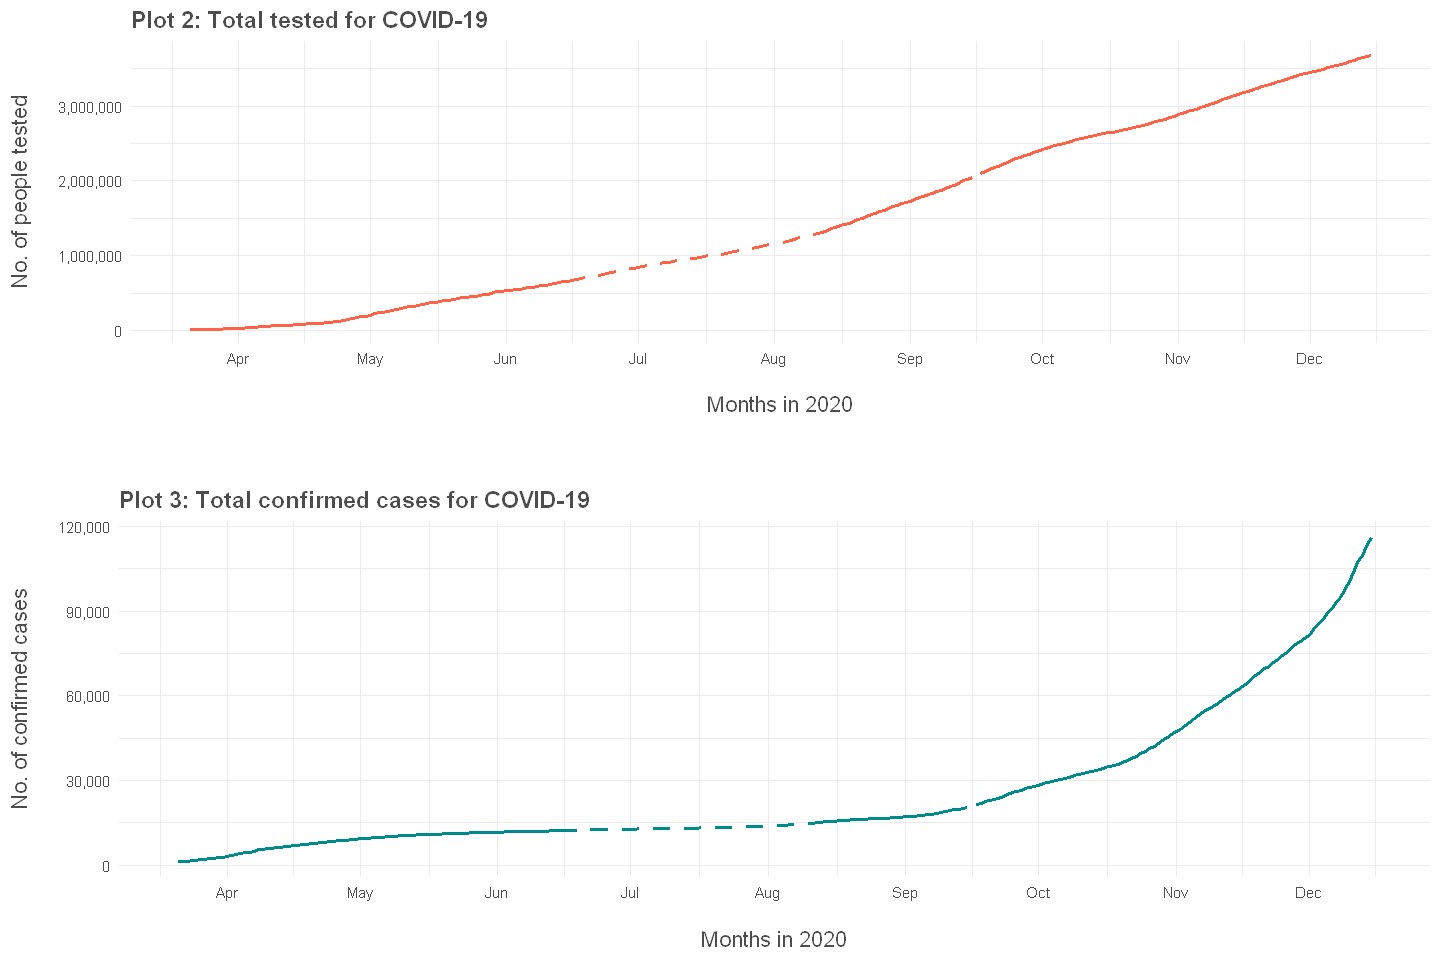

In [12]:
##########################################################################################################################
############ Step 1: First we create a plot "A" for total number of people tested and assign it to a variable ############
##########################################################################################################################

total_tested_plot <- ggplot(denmark_covid_data, aes(x = date)) +        # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tested), color = "tomato1", lwd = 1) +               # Line plot for total number of peple tested
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +    # Improving the x-axis to show all months
xlab("\nMonths in 2020") +                                                # Label for x-axis
scale_y_continuous("No. of people tested\n",                              # Label for y-axis
                     labels = function(x) prettyNum(x, big.mark=",", scientific = FALSE)
                   ) +
ggtitle("Plot 2: Total tested for COVID-19") +                                     # Title for the plot A
labs(
    caption = paste("\n")
)

##########################################################################################################################
############Step 2: Then we create a plot "B" for total number of confirmed cases and assign it to a variable ###########
##########################################################################################################################

total_confirmed_cases_plot <- ggplot(denmark_covid_data, aes(x = date)) +   # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_cases), color = "cyan4", lwd = 1) +                  # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +        # Improving the x-axis to show all months
xlab("\nMonths in 2020") +                                                    # Label for x-axis
scale_y_continuous("No. of confirmed cases\n",                                # Label for y-axis
                     labels = function(x) prettyNum(x, big.mark=",", scientific = FALSE)
                   ) +
ggtitle("Plot 3: Total confirmed cases for COVID-19")                                  # Title for the plot

##########################################################################################################################
####################################### Step 3: Finally make a grid of both plots ######################################
##########################################################################################################################
options(repr.plot.height=8)
ggarrange(total_tested_plot, total_confirmed_cases_plot, ncol = 1)
options(repr.plot.height=6)


Plot 2 and 3 represents the total number of people tested for COVID-19 and total confirmed cases respectively. As the hypothesis stated, there is definitely a correlation between the two variables. It might also seem like there is a causation between the two by just glancing at the two plots but that is not strictly true. Causation is generally understood using common sense rather than using mathematics.

We state that there is no causation between the two variables because increase in number of cases does not cause in increase of total confirmed cases. Total tested and total confirmed cases may have a strong correaltion without having a cause/effect relationship.


### Pearson correlation coefficient

Now, let's calculate the correlation between the two variables. To do so, we will be using Pearson correlation coefficient. Pearson correlation coefficient analyzes the realtionship between two variables, draws a line through them and determines whether the relationship is strong or weak and positive or negative. When the data is passed through the formula, the returned value is between -1 an 1, where calue closer to -1 means strong negative relationship and vice-versa.

Pearson correlation coefficient is defined in statistics as the measurement of the strength of the relationship between two variables and their association with each other (todo: cite). The formula for Pearson correlation coefficient is:

\begin{equation}
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
\end{equation}

To determine the relationship between increasing cases and the increase in testing, we can
visualize the data using a scatter plot. The dependent variable, denoted by the Y-axis, in this case will
be the total number of confirmed cases and the independent variable, denoted by X-axis, will be the total
number of tests conducted.



	Pearson's product-moment correlation

data:  denmark_covid_data$total_cases and denmark_covid_data$total_tested
t = 29.711, df = 251, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8517549 0.9070151
sample estimates:
      cor 
0.8823918 


`geom_smooth()` using formula 'y ~ x'


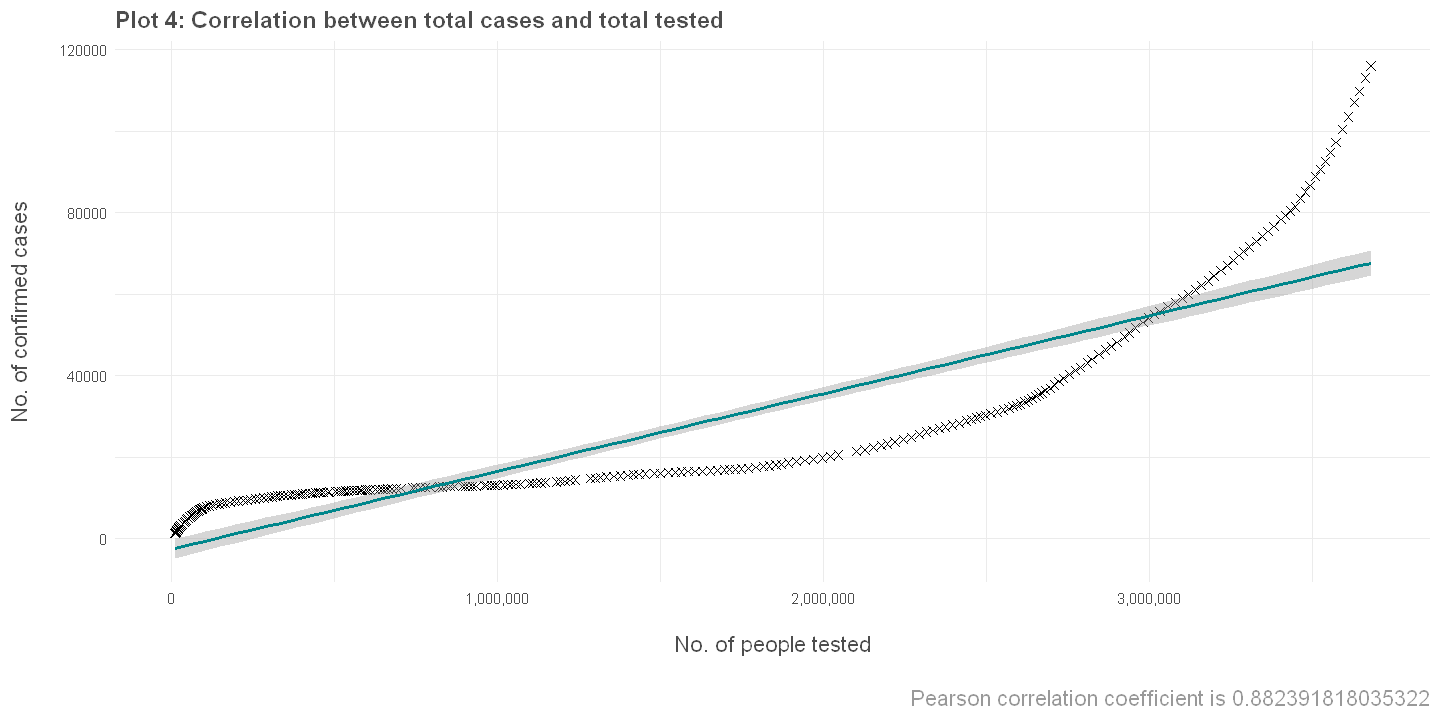

In [13]:
# Calculating the Correlation Coefficient
pcc <- cor.test(denmark_covid_data$total_cases,
denmark_covid_data$total_tested,
method = "pearson")
pcc

# Plotting the variables
ggplot(denmark_covid_data,
       aes(x=total_tested, y=total_cases)) +
geom_point(size=2, shape=4) +
geom_smooth(method = "lm", color="turquoise4") +
scale_x_continuous("\nNo. of people tested",
                   labels = function(x) prettyNum(x, big.mark=",", scientific = FALSE)
                   ) +
scale_y_continuous("No. of confirmed cases\n") +
ggtitle("Plot 4: Correlation between total cases and total tested") + 
labs(
    caption = paste("\nPearson correlation coefficient is", pcc$estimate)
)

The scatter plot confirms that the relation between the 2 variables, confirmed cases and total people tested, has a positive, strong and non-linear relationship. The relationship is positive because of the nature of the linear line (blue in color) slanting upwards, from left to right. Since the plots do not follow the shape or form of the liner line, the relationship’s form is non-linear. Finally, the variables have a strong relationship because they are follow a certain curve and are in compact alignment, meaning they are not scattered all over the chart.

Also, the output of Pearson correlation coefficient is 0.88 which illustrates the same conclusion as the scatter plot, which is calculated just above the plot. Since 0.88 is greater than 0, the relationship is positive and closer to the maximum possible output of 1, concluding the strong relationship.



In [14]:
# Setting theme for plot in Markdown
theme_set(markdown_theme)
options(repr.plot.width = 4, repr.plot.height = 2)

## Modeling and Prediction with Polynomial Regression

In this section, we aim to build a model and extend plot 3, total number of confirmed cases over time, with predictions for the next couple of weeks. Since the relationship of the variables are not linear, we decided to use polynomial regression as it can fit a non-linear relationship.

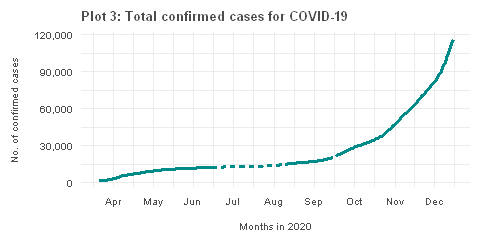

In [15]:
total_confirmed_cases_plot

In the polynomial model, the degree of the polynomial is hyperparameter. To get the optimum polynomial degree for our model, we perform a grid search between 1 and 10 degrees. We divide our dataset into training and testing sets with 80% and 20% respectively. After we create the models, the interesting output to focus is the model's Root Mean Square Error (RMSE), which is the standard deviation of the residuals. The best model within the varying polynomial degrees is the one with the least test RMSE, train RMSE, and degree.

The mathematical representation of RMSE is:
\begin{equation}
RMSE = \sqrt{\displaystyle \frac{1}{n}\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2}
\end{equation}

### Training the model

The next step is to implement the steps above. So we split the data, train the models with a range of polynomial degress and print the result. The output table is the result with least test RMSE, train RMSE, and degree on top.

In [16]:
# Resetting theme for normal plots
options(repr.plot.width = 14, repr.plot.height = 6)
theme_set(theme)

In [17]:
# The set.seed() function sets the starting number used to generate a sequence of random numbers – 
# it ensures that you get the same result if you start with that same seed each time you run the same process.
set.seed(2020)

training_testing_data_split <- initial_time_split(denmark_covid_data, prop = 0.8)
training_set <- training(training_testing_data_split)
testing_set <- testing(training_testing_data_split)
output <- data.frame(degree = double(), train_rmse = double(), test_rmse = double())

for(degree in 1:10){
    polynomial_model <- lm(total_cases ~ poly(day, degree = degree, raw = TRUE), training_set)
    training_set["fitted"] <- predict(polynomial_model, training_set)
    testing_set["predicted"] <- predict(polynomial_model, testing_set)
    output <- add_row(
        output,
        degree = degree, 
        train_rmse = rmse_vec(training_set$total_cases, training_set$fitted), 
        test_rmse = rmse_vec(testing_set$total_cases, testing_set$predicted)
    )
}

best_degree <- arrange(output, test_rmse, train_rmse)$degree[1]
least_test_rmse <- round(arrange(output, test_rmse, train_rmse)$test_rmse[1],2)
least_train_rmse <- round(arrange(output, test_rmse, train_rmse)$train_rmse[1],2)
polynomial_model <- lm(total_cases ~ poly(day, best_degree, raw = TRUE),training_set)

cat(paste("The best degree for the model is: ", best_degree))
arrange(output, test_rmse, train_rmse, degree)

The best degree for the model is:  4

degree,train_rmse,test_rmse
4,455.7251,6858.037
3,502.5180,11148.809
5,440.4562,12497.523
6,405.7335,32368.520
2,2671.2283,34869.609
1,3276.9911,42833.942
7,291.5103,112136.587
9,287.7138,121377.215
8,288.0104,143586.396
10,220.7665,672487.288


### Visualizing RMSE though different degrees
The above data can be visualized with a chart. It helps to understand the various RMSE through different polynomial degrees, and explians why 4 is the best degree for the model.

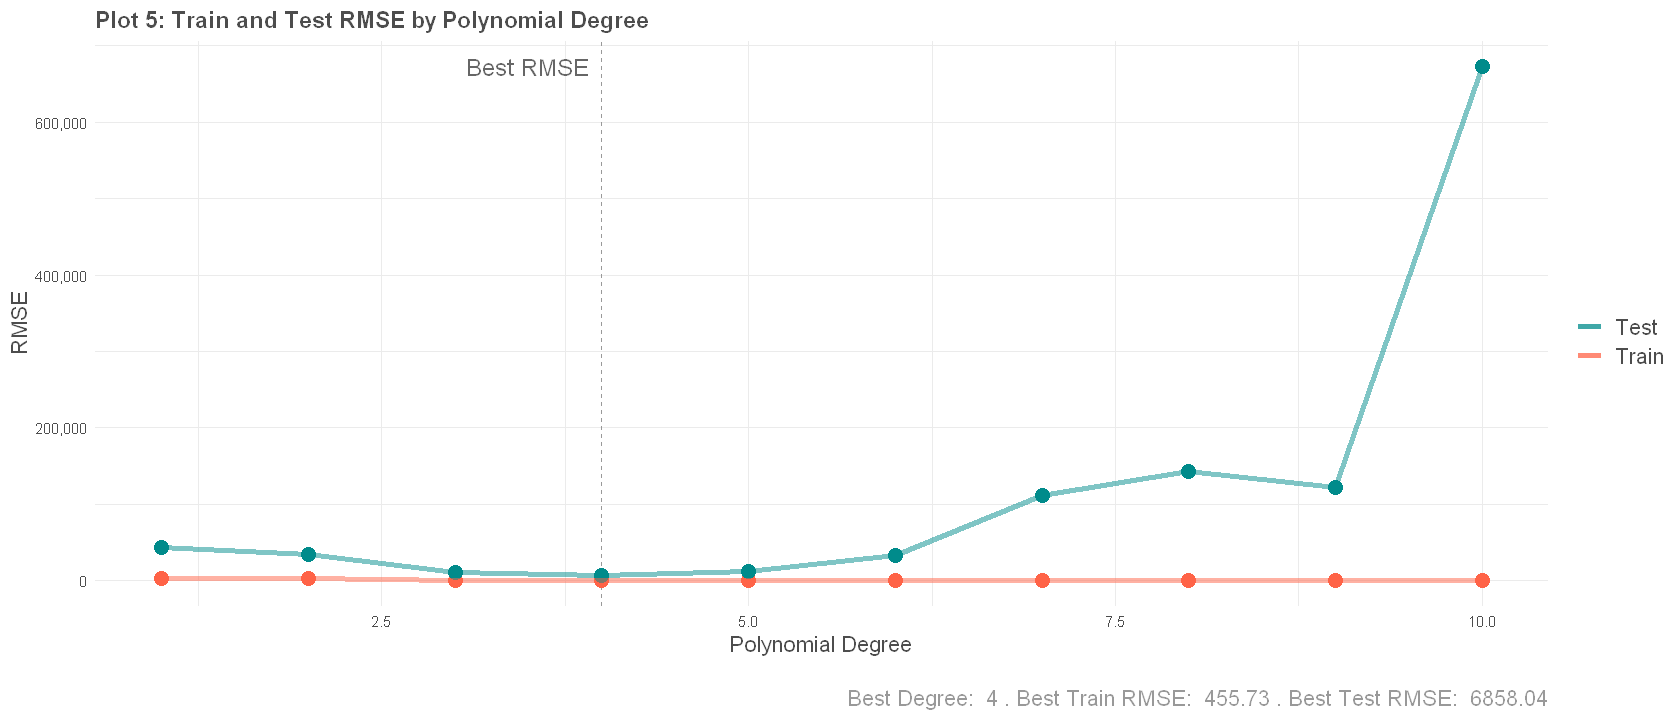

In [18]:
ggplot(output, aes(x = degree)) +
geom_vline(xintercept = best_degree, linetype="dashed", color="gray60") +
  geom_point(aes(y = train_rmse), color = "tomato1", size = 4) +
  geom_point(aes(y = test_rmse), color = "cyan4", size = 4) +
  geom_line(aes(y = train_rmse, color = "tomato1"), size = 1.5, alpha = .5) +
  geom_line(aes(y = test_rmse, color = "cyan4"), size = 1.5, alpha = .5) +
  annotate(
    "text",
    x = best_degree - .5,
    y = max(c(output$train_rmse, output$test_rmse)),
    label = "Best RMSE",
    size = 5,
    color = "gray40"
  ) +
  scale_y_continuous("RMSE",
                     labels = function(x) prettyNum(x, big.mark=",", scientific = FALSE)
                     ) +
  labs(
    title = "Plot 5: Train and Test RMSE by Polynomial Degree",
    x = "Polynomial Degree",
    y = "RMSE",
    caption = paste(
        "\nBest Degree: ",
        best_degree,
        ". Best Train RMSE: ", 
        least_train_rmse,
        ". Best Test RMSE: ",
        least_test_rmse
    )
  ) +
  scale_color_identity(
    name = "",
    breaks = c("cyan4", "tomato1","gray60"),
    labels = c("Test", "Train", "Best"),
    guide = "legend"
  )

### Fitting data onto the model

Now that we have the best polynomial degree and trained the model, we can continue to apply the model onto our dataset. Here, we use the model to predict the next two weeks after the last date of the dataset, i.e December 15, 2020.

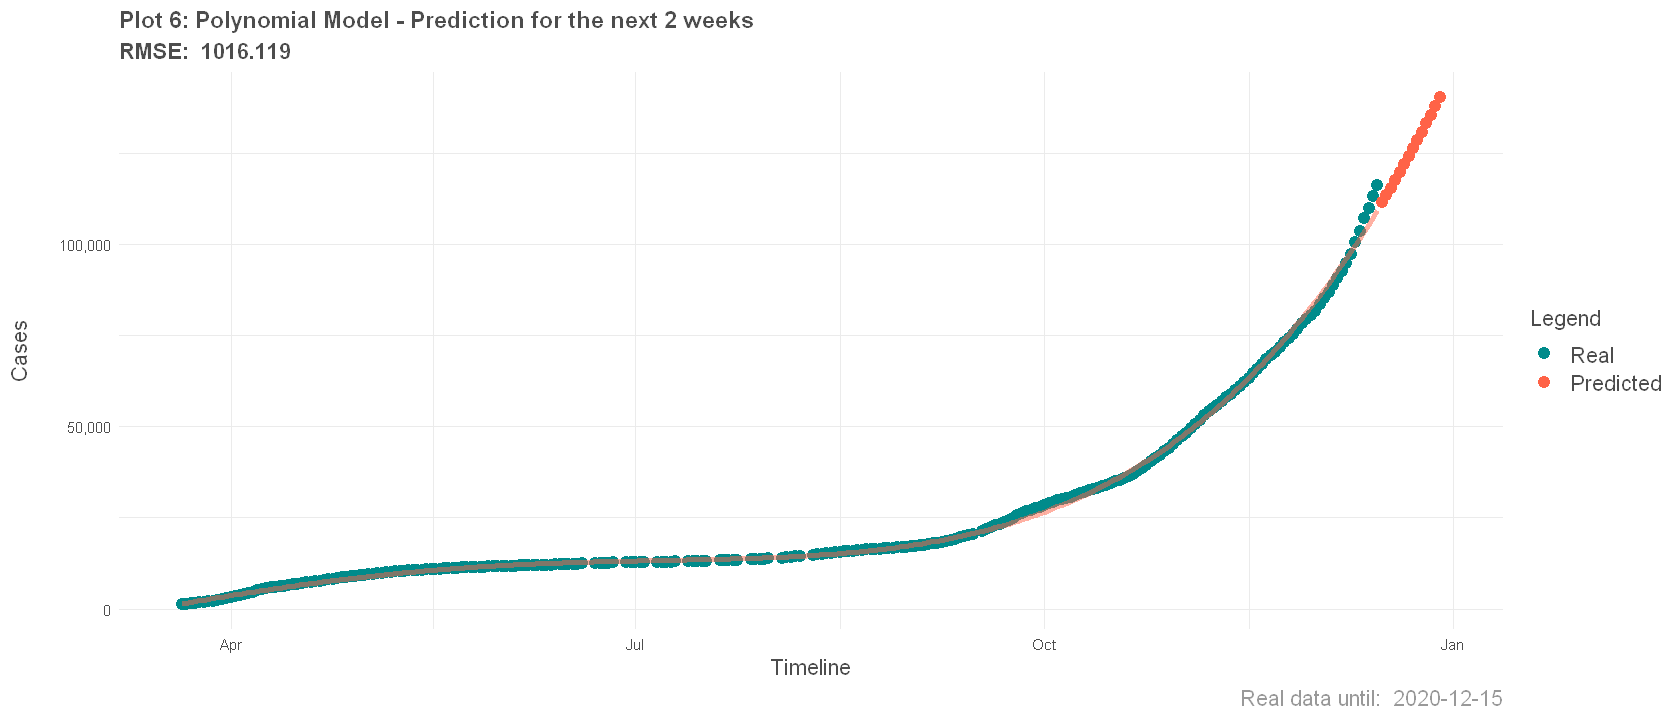

In [19]:
polynomial_model <- lm(total_cases ~ poly(day, best_degree, raw = TRUE), denmark_covid_data)
max_date <- max(denmark_covid_data$date)

denmark_new_data <- data.frame(
  date = seq(as.Date(max_date+1), by="day", length = 14),
  day = seq(max(denmark_covid_data$day) + 1, max(denmark_covid_data$day) + 14, by = 1),
  total_cases = c(0)
)

denmark_covid_data <- select(denmark_covid_data, date, day, total_cases)
denmark_covid_data["predicted"] <- predict(polynomial_model, denmark_covid_data)
denmark_new_data["predicted"] <- predict(polynomial_model, denmark_new_data)

rmse <- round(rmse_vec(denmark_covid_data$total_cases, denmark_covid_data$predicted), 3)

ggplot() +
  geom_point(data = denmark_covid_data, aes(x = date, y = total_cases, color="cyan4"), size = 3) +
  geom_point(data = denmark_new_data, aes(x = date, y = predicted, color="tomato1"), size = 3) +
  geom_line(data = denmark_covid_data, aes(x = date, y = predicted), size = 1.5, alpha = .5, color="tomato1") +
  labs(
    title = "Plot 6: Polynomial Model - Prediction for the next 2 weeks",
    subtitle = paste("RMSE: ",rmse),
    x = "Timeline",
    y = "Cases",
    caption = paste("Real data until: ", max_date)
  ) +
  scale_color_identity(
    name = "Legend",
    breaks = c("cyan4", "tomato1"),
    labels = c("Real", "Predicted"),
    guide = "legend"
  ) +
  scale_y_continuous("Cases\n",
                     labels = function(x) prettyNum(x, big.mark=",", scientific = FALSE)
                   )

Finally, we print tables with real data fitted on to the model and data predicted for the next two weeks. The first table displays the model's predicted values versus the actual data, and their differences. This helps us understand the model's margin of error for predicted data.

In [20]:
cat("Fitted data onto model, last 5 days")
select(denmark_covid_data, date, day, total_cases, predicted) %>% mutate(difference = total_cases - predicted) %>% tail(5)
cat("Next 2 weeks prediction")
denmark_new_data

Fitted data onto model, last 5 days

,date,day,total_cases,predicted,difference
266,2020-12-11,265,103564,101701.2,1862.839
267,2020-12-12,266,107116,103580.0,3535.974
268,2020-12-13,267,109758,105488.2,4269.752
269,2020-12-14,268,113095,107426.1,5668.881
270,2020-12-15,269,116087,109393.9,6693.064


Next 2 weeks prediction

date,day,total_cases,predicted
2020-12-16,270,0,111392.0
2020-12-17,271,0,113420.6
2020-12-18,272,0,115480.0
2020-12-19,273,0,117570.6
2020-12-20,274,0,119692.6
2020-12-21,275,0,121846.4
2020-12-22,276,0,124032.2
2020-12-23,277,0,126250.3
2020-12-24,278,0,128501.1
2020-12-25,279,0,130784.9


## Conclusion of EDA

In this experiment, we carried out our own Exploratory Data Analysis for Denmark's COVID-19 cases. We used data from Statistikbanken which consists of official data collected throughout the pandemic. The goal was to use historical data to analyze the effects of decisions enforced by the officials, and investigate if they had any effect in controlling the spread of the virus. Additionally, we used machine learning to build models and predict if the number of total cases would increase or not. 

And the verdict was that with the current trend, the predicted cases would increase over the next two weeks (from December 15, 2020). The important thing to keep in mind is that there are many non-measured variables which play an important role in controlling the spread of virus. While this experiment used the raw data exposing the number of cases, tests, etc., it doens't take into account the introduction of vaccination, effect of holidays, people's behaviour towards gatherings and ignoring the use of mask in public, among many others. This is purely a statistical analysis to understand the numbers, effects of governmental decisions and predicting the future using machine learning.